In [1]:
import pandas as pd



In [2]:
df = pd.read_csv('ich_data_w_scores_modified.csv')


In [3]:
for a, b in zip(df.columns, df.dtypes.tolist()):
    print(a, b)


AGE int64
GENDER int64
ETHNICITY int64
MODE int64
NIHSSADM int64
RBS float64
SBP int64
DBP int64
HR int64
BMI float64
PRIORAC int64
PRIORAP int64
PRIORANTIHTN int64
PRIORANTIDM int64
DMADM int64
HTNADM int64
HTNTYPE int64
DYSLIPADM int64
STROKE int64
AF int64
CAD int64
SMOKING int64
DMTYPE int64
HbA1c float64
CHOL float64
TRIG float64
HDL float64
LDL float64
PLT float64
INR float64
APTT float64
EVD int64
HCM int64
COMBINED int64
ANYPROCEDURE int64
SWCARE int64
SWDIRECT int64
ICUCARE int64
INTUBATED int64
ARETRIALLINE int64
SITE int64
GCSADM int64
VOLUME1 float64
HEMSTATUS int64
GCSSCORE int64
IVH int64
VOLUME30 int64
INFRATENTORIAL int64
AGE80 int64
ICHSCORE int64
MORT90 int64
MRS90 int64
HEMSIZE int64
BLEEDSITE int64
oICH_score int64
mICH_score int64
ICH_GS_score int64
LSICH_score int64
ICH_FOS_score int64
Max_ICH_score int64


In [4]:
# Assuming `df` is your DataFrame
score_cols = ["oICH_score", "mICH_score", "ICH_GS_score", "LSICH_score" , "ICH_FOS_score", "Max_ICH_score"]
df = df.drop(columns=score_cols).reset_index(drop=True)
# Features and Targets
X = df.drop(columns=['MORT90', 'MRS90'])
y_mort90 = df['MORT90']
y_mrs90 = df['MRS90'].apply(lambda x: 0 if x <= 3 else 1)  # Binarizing MRS90 as done previously

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_mort90, y_test_mort90 = train_test_split(X, y_mort90, test_size=0.2, random_state=42)
X_train, X_test, y_train_mrs90, y_test_mrs90 = train_test_split(X, y_mrs90, test_size=0.2, random_state=42)


In [5]:
X.iloc[0]

AGE                49.000000
GENDER              1.000000
ETHNICITY           3.000000
MODE                1.000000
NIHSSADM           21.000000
RBS                13.200000
SBP               156.000000
DBP               100.000000
HR                100.000000
BMI                24.600000
PRIORAC             0.000000
PRIORAP             0.000000
PRIORANTIHTN        0.000000
PRIORANTIDM         0.000000
DMADM               0.000000
HTNADM              1.000000
HTNTYPE             1.000000
DYSLIPADM           0.000000
STROKE              0.000000
AF                  0.000000
CAD                 1.000000
SMOKING             0.000000
DMTYPE              0.000000
HbA1c               6.489354
CHOL                4.615537
TRIG                1.593751
HDL                 1.060948
LDL                 2.880385
PLT               258.231486
INR                 1.000000
APTT               29.500000
EVD                 0.000000
HCM                 0.000000
COMBINED            0.000000
ANYPROCEDURE  

In [6]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
model_mort90 = LogisticRegression(max_iter=1000)  # Increasing max_iter for convergence
model_mrs90 = LogisticRegression(max_iter=1000)


In [7]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Algorithm to use for optimization
}

# Grid search for MORT90
grid_search_mort90 = GridSearchCV(model_mort90, param_grid, cv=5, scoring='roc_auc')
grid_search_mort90.fit(X_train, y_train_mort90)

# Grid search for MRS90
grid_search_mrs90 = GridSearchCV(model_mrs90, param_grid, cv=5, scoring='roc_auc')
grid_search_mrs90.fit(X_train, y_train_mrs90)


/Users/umarayub/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/umarayub/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='roc_auc')

In [8]:
from sklearn.metrics import roc_auc_score

# Predictions
y_pred_proba_mort90 = grid_search_mort90.predict_proba(X_test)[:, 1]
y_pred_proba_mrs90 = grid_search_mrs90.predict_proba(X_test)[:, 1]

# AUC Scores
auc_mort90 = roc_auc_score(y_test_mort90, y_pred_proba_mort90)
auc_mrs90 = roc_auc_score(y_test_mrs90, y_pred_proba_mrs90)

print(f'AUC for MORT90: {auc_mort90}')
print(f'AUC for MRS90: {auc_mrs90}')


AUC for MORT90: 0.8841260520649833
AUC for MRS90: 0.8769545454545454


In [9]:
# AUC for MORT90: 0.9779800352319437
# AUC for MRS90: 0.9517272727272726

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Define the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Perform cross-validation for MORT90
scores_mort90 = cross_val_score(xgb_clf, X, y_mort90, cv=5, scoring='roc_auc')
print(f'MORT90 - XGBoost Cross-Validated AUC: {scores_mort90.mean()}')

# Perform cross-validation for MRS90
scores_mrs90 = cross_val_score(xgb_clf, X, y_mrs90, cv=5, scoring='roc_auc')
print(f'MRS90 - XGBoost Cross-Validated AUC: {scores_mrs90.mean()}')


MORT90 - XGBoost Cross-Validated AUC: 0.8552140290775402
MRS90 - XGBoost Cross-Validated AUC: 0.8629333255528024


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest classifier
rf_clf = RandomForestClassifier()

# Perform cross-validation for MORT90
scores_mort90 = cross_val_score(rf_clf, X, y_mort90, cv=5, scoring='roc_auc')
print(f'MORT90 - Random Forest Cross-Validated AUC: {scores_mort90.mean()}')

# Perform cross-validation for MRS90
scores_mrs90 = cross_val_score(rf_clf, X, y_mrs90, cv=5, scoring='roc_auc')
print(f'MRS90 - Random Forest Cross-Validated AUC: {scores_mrs90.mean()}')


MORT90 - Random Forest Cross-Validated AUC: 0.8776613724561795
MRS90 - Random Forest Cross-Validated AUC: 0.8667923927782993


In [13]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    # Add more parameters as needed
}

# Parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    # Add more parameters as needed
}


# Repeat the process for Random Forest and MRS90


In [14]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y_mort90/y_mrs90 are already defined

# Grid search for XGBoost - MORT90
grid_search_xgb_mort90 = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_param_grid, cv=5, scoring='roc_auc')
grid_search_xgb_mort90.fit(X, y_mort90)
print(f'Best AUC for MORT90 with XGBoost: {grid_search_xgb_mort90.best_score_}')

# Grid search for XGBoost - MRS90
grid_search_xgb_mrs90 = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_param_grid, cv=5, scoring='roc_auc')
grid_search_xgb_mrs90.fit(X, y_mrs90)
print(f'Best AUC for MRS90 with XGBoost: {grid_search_xgb_mrs90.best_score_}')

# Grid search for Random Forest - MORT90
grid_search_rf_mort90 = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='roc_auc')
grid_search_rf_mort90.fit(X, y_mort90)
print(f'Best AUC for MORT90 with Random Forest: {grid_search_rf_mort90.best_score_}')

# Grid search for Random Forest - MRS90
grid_search_rf_mrs90 = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='roc_auc')
grid_search_rf_mrs90.fit(X, y_mrs90)
print(f'Best AUC for MRS90 with Random Forest: {grid_search_rf_mrs90.best_score_}')


Best AUC for MORT90 with XGBoost: 0.8654300341032879
Best AUC for MRS90 with XGBoost: 0.8612810225156593
Best AUC for MORT90 with Random Forest: 0.8831841237126165
Best AUC for MRS90 with Random Forest: 0.8791449615504974


In [16]:
# Feature Importance for RF

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Assuming X_test and y_test_mort90, y_test_mrs90 are your test sets

# Permutation feature importance for Random Forest - MORT90
result_mort90 = permutation_importance(grid_search_rf_mort90.best_estimator_, X_test, y_test_mort90, n_repeats=10, random_state=42, n_jobs=-1)

# Permutation feature importance for Random Forest - MRS90
result_mrs90 = permutation_importance(grid_search_rf_mrs90.best_estimator_, X_test, y_test_mrs90, n_repeats=10, random_state=42, n_jobs=-1)


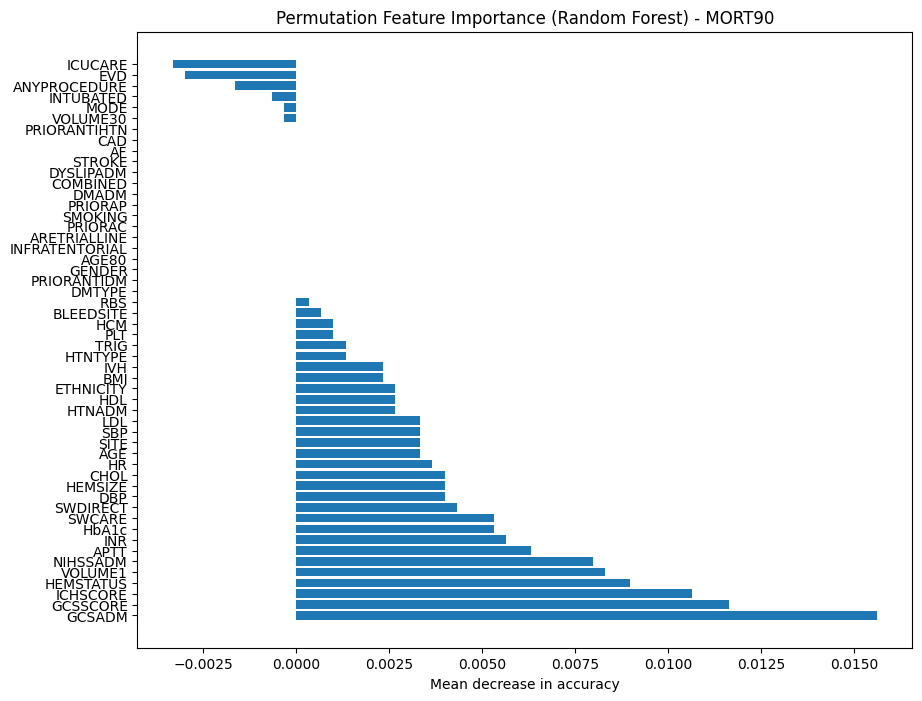

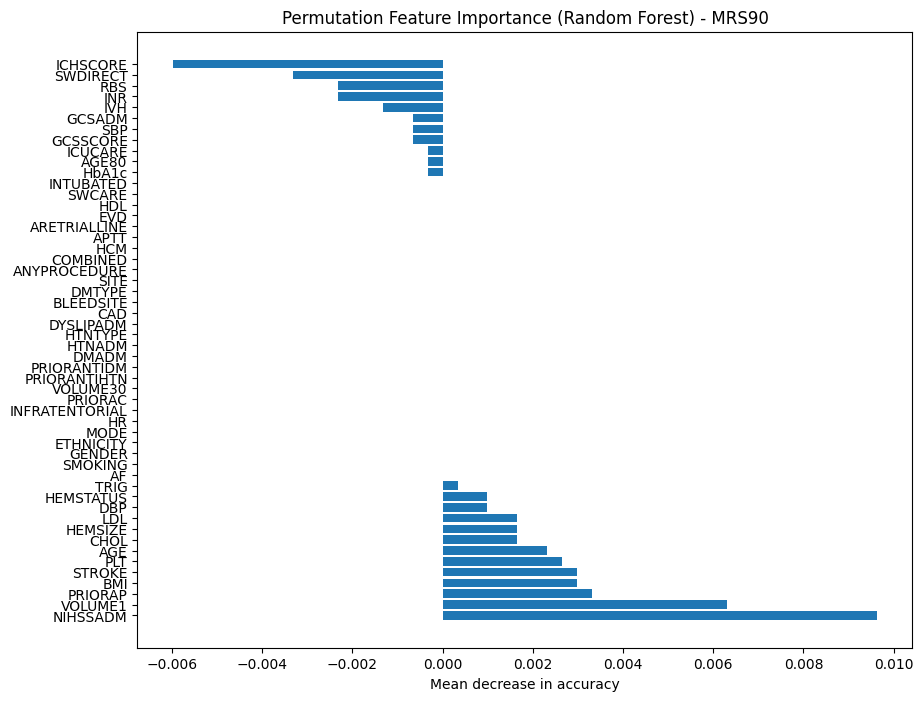

In [17]:
import numpy as np 
def plot_feature_importances(importances, feature_names, title):
    # Sort feature importances in descending order
    indices = np.argsort(importances.mean(axis=1))[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [feature_names[i] for i in indices]

    # Create plot
    plt.figure(figsize=(10, 8))
    plt.title(title)
    plt.barh(range(X.shape[1]), importances.mean(axis=1)[indices])
    plt.yticks(range(X.shape[1]), names, rotation=0)
    plt.xlabel("Mean decrease in accuracy")
    plt.show()

# Plot for MORT90
plot_feature_importances(result_mort90.importances, X.columns, "Permutation Feature Importance (Random Forest) - MORT90")

# Plot for MRS90
plot_feature_importances(result_mrs90.importances, X.columns, "Permutation Feature Importance (Random Forest) - MRS90")


In [18]:
# Neural Nets


from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [33]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [34]:
history_mort90 = model.fit(X_train_scaled, y_train_mort90, epochs=50, batch_size=32, validation_split=0.2)



Epoch 1/50
30/30 [==============================] - 1s 5ms/step - loss: 0.5991 - accuracy: 0.6750 - val_loss: 0.3923 - val_accuracy: 0.8583
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8562 - val_loss: 0.3356 - val_accuracy: 0.8583
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.8948 - val_loss: 0.3263 - val_accuracy: 0.8667
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 0.2583 - accuracy: 0.9073 - val_loss: 0.3241 - val_accuracy: 0.8792
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.9115 - val_loss: 0.3241 - val_accuracy: 0.8833
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 0.2222 - accuracy: 0.9167 - val_loss: 0.3234 - val_accuracy: 0.8792
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.9219 - val_loss: 0.3272 - val_accuracy: 0.8875
Epoch 8/50
30/30 [==

In [35]:
loss, accuracy = model.evaluate(X_test_scaled,  y_test_mort90)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


10/10 [==============================] - 0s 916us/step - loss: 0.7575 - accuracy: 0.8472
Test Loss: 0.7574607133865356
Test Accuracy: 0.8471760749816895


In [36]:
# Generate probability predictions for the test set
y_pred_probs = model.predict(X_test_scaled).ravel()


10/10 [==============================] - 0s 626us/step


In [37]:
from sklearn.metrics import roc_auc_score

# Compute AUC
auc = roc_auc_score(y_test_mort90, y_pred_probs)
print(f'Test AUC: {auc}')


Test AUC: 0.7879232726560972


In [ ]:
#history_mrs90 = model.fit(X_train_scaled, y_train_mrs90, epochs=50, batch_size=32, validation_split=0.2)
